In [13]:
import numpy as np
import itertools
import pymcdm.normalizations as norm
from pymcdm.methods import *
from pymcdm.helpers import rrankdata
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# EXAMPLE

In [14]:
matrix = np.array([
    [3.15, 2.29, 1.81],
    [3.20, 2.42, 1.78],
])

weights = np.array([0.43, 0.33, 0.24])
types = np.array([1, -1, 1])

In [15]:
mcda = TOPSIS(normalization_function=norm.max_normalization)
pref = mcda(matrix, weights, types)
print(pref)

[0.73002812 0.26997188]


In [16]:
modifications = np.array([3, 2, 4])

criteria_set = np.arange(0, matrix.shape[1], 1)
C = list(itertools.combinations(criteria_set, 2))
print(C)

a = np.arange(0, modifications[0]+1)
b = np.arange(0, modifications[1]+1)
M = list(itertools.product(*[a, b]))
print(M)

[(0, 1), (0, 2), (1, 2)]
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]


In [17]:
print('Modifications of decision matrix for alternative A1 and criteria indexes (0, 1)')
for alternative in range(1):
    error_alt = []
    for comb in C:
        error_comb = []
        for improve in M:
            both_crit_matrix = matrix.copy()
            
            if types[comb[0]] == 1:
                # both criterion modified
                both_crit_matrix[alternative, comb[0]] = both_crit_matrix[alternative, comb[0]] + (both_crit_matrix[alternative, comb[0]] * improve[0]) / 100
            else:
                # both criterion modified
                both_crit_matrix[alternative, comb[0]] = both_crit_matrix[alternative, comb[0]] - (both_crit_matrix[alternative, comb[0]] * improve[0]) / 100
            
            if types[comb[1]] == 1:
                # both criterion modified
                both_crit_matrix[alternative, comb[1]] = both_crit_matrix[alternative, comb[1]] + (both_crit_matrix[alternative, comb[1]] * improve[1]) / 100    
            else:
                # both criterion modified
                both_crit_matrix[alternative, comb[1]] = both_crit_matrix[alternative, comb[1]] - (both_crit_matrix[alternative, comb[1]] * improve[1]) / 100    
            
            print(improve, round(both_crit_matrix[alternative, comb[0]], 3), round(both_crit_matrix[alternative, comb[1]], 3))
        break

Modifications of decision matrix for alternative A1 and criteria indexes (0, 1)
(0, 0) 3.15 2.29
(0, 1) 3.15 2.267
(0, 2) 3.15 2.244
(1, 0) 3.182 2.29
(1, 1) 3.182 2.267
(1, 2) 3.182 2.244
(2, 0) 3.213 2.29
(2, 1) 3.213 2.267
(2, 2) 3.213 2.244
(3, 0) 3.244 2.29
(3, 1) 3.244 2.267
(3, 2) 3.244 2.244


# INPUT DATA

In [18]:
matrix = np.array([
    [4, 4, 0.2],
    [1, 5, 0.5],
    [3, 2, 0.3],
    [4, 2, 0.5]
])

weights = np.array([0.3, 0.5, 0.2])
types = np.array([1, -1, 1])

# RESEARCH APPROACH METHOD

In [19]:
def generate_combinations(matrix, min_crit=2):

    criteria_set = np.arange(0, matrix.shape[1], 1)

    return list(itertools.combinations(criteria_set, min_crit))

def generate_modifications_combinations(combinations, n=100):
    n = 100
    changes = np.arange(0, n+1)

    return list(itertools.product(*[changes, changes]))

c = generate_combinations(matrix, 2)
m = generate_modifications_combinations(c)


In [20]:
print(c)
print(m[0:10])

[(0, 1), (0, 2), (1, 2)]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]


In [21]:
def examine_error(matrix, weights, types, method, modification_size = 100):
    
    base_pref = method(matrix, weights, types)

    data = []
    error = []

    # combinations
    c_combs = generate_combinations(matrix)
    changes_combs = generate_modifications_combinations(c_combs, modification_size)

    for alternative in range(matrix.shape[0]):
    # for alternative in range(1):
        error_alt = []
        for comb in c_combs:
            error_comb = []
            for improve in changes_combs:
                first_crit_matrix = matrix.copy()
                second_crit_matrix = matrix.copy()
                both_crit_matrix = matrix.copy()
                
                if types[comb[0]] == 1:
                    # first criterion modified
                    first_crit_matrix[alternative, comb[0]] = first_crit_matrix[alternative, comb[0]] + (first_crit_matrix[alternative, comb[0]] * improve[0]) / 100
                    # both criterion modified
                    both_crit_matrix[alternative, comb[0]] = both_crit_matrix[alternative, comb[0]] + (both_crit_matrix[alternative, comb[0]] * improve[0]) / 100
                else:
                    # first criterion modified
                    first_crit_matrix[alternative, comb[0]] = first_crit_matrix[alternative, comb[0]] - (first_crit_matrix[alternative, comb[0]] * improve[0]) / 100
                    # both criterion modified
                    both_crit_matrix[alternative, comb[0]] = both_crit_matrix[alternative, comb[0]] - (both_crit_matrix[alternative, comb[0]] * improve[0]) / 100
                
                if types[comb[1]] == 1:
                    # second criterion modified
                    second_crit_matrix[alternative, comb[1]] = second_crit_matrix[alternative, comb[1]] + (second_crit_matrix[alternative, comb[1]] * improve[1]) / 100
                    # both criterion modified
                    both_crit_matrix[alternative, comb[1]] = both_crit_matrix[alternative, comb[1]] + (both_crit_matrix[alternative, comb[1]] * improve[1]) / 100    
                else:
                    # second criterion modified
                    second_crit_matrix[alternative, comb[1]] = second_crit_matrix[alternative, comb[1]] - (second_crit_matrix[alternative, comb[1]] * improve[1]) / 100
                    # both criterion modified
                    both_crit_matrix[alternative, comb[1]] = both_crit_matrix[alternative, comb[1]] - (both_crit_matrix[alternative, comb[1]] * improve[1]) / 100    
                
                first_crit_prefs = method(first_crit_matrix, weights, types)
                second_crit_prefs = method(second_crit_matrix, weights, types)
                both_crit_prefs = method(both_crit_matrix, weights, types)

                data.append({
                    'combs': comb,
                    'improve': improve,
                    'first_matrix': first_crit_matrix,
                    'second_matrix': second_crit_matrix, 
                    'both_matrix': both_crit_matrix, 
                    'first_pref': first_crit_prefs[alternative], 
                    'second_pref': second_crit_prefs[alternative],
                    'both_pref': both_crit_prefs[alternative],
                    'error': (both_crit_prefs[alternative] - base_pref[alternative]) - ((first_crit_prefs[alternative] - base_pref[alternative]) + (second_crit_prefs[alternative] - base_pref[alternative]))
                })
                # calculation of difference in preferences
                error_comb.append((both_crit_prefs[alternative] - base_pref[alternative]) - ((first_crit_prefs[alternative] - base_pref[alternative]) + (second_crit_prefs[alternative] - base_pref[alternative])))
            error_alt.append(error_comb)

        error.append(error_alt)
    
    return data, error

## INITIAL PREFERENCES

In [24]:
methods_dict = {
    'TOPSIS': TOPSIS(normalization_function=norm.max_normalization),
    'ARAS': ARAS(normalization_function=norm.max_normalization),
    'MARCOS': MARCOS(normalization_function=norm.max_normalization),
    'VIKOR': VIKOR(normalization_function=norm.max_normalization),
    'WASPAS': WASPAS(normalization_function=norm.max_normalization),
    'OCRA': OCRA(normalization_function=norm.max_normalization),
    'CODAS': CODAS(normalization_function=norm.max_normalization),
    'WPM': WPM(normalization_function=norm.max_normalization),
    'MAIRCA': MAIRCA(normalization_function=norm.max_normalization),
    'MABAC': MABAC(normalization_function=norm.max_normalization)
}

for name, method in methods_dict.items():
    prefs_results = method(matrix, weights, types)
    print(f'{name}: {np.round(prefs_results, 3)}')

TOPSIS: [0.514 0.242 0.755 1.   ]
ARAS: [0.6   0.344 0.806 1.   ]
MARCOS: [0.582 0.333 0.782 0.97 ]
VIKOR: [0.667 1.    0.279 0.   ]
WASPAS: [0.426 0.138 0.643 0.787]
OCRA: [0.205 0.    0.37  0.525]
CODAS: [-0.393 -1.718  0.633  1.477]
WPM: [0.372 0.    0.642 0.775]
MAIRCA: [0.13  0.181 0.089 0.05 ]
MABAC: [-0.044 -0.249  0.121  0.276]


# SENSITIVITY ANALYSIS EVALUATION

In [31]:
for name, method in methods_dict.items():
    data, error = examine_error(matrix, weights, types, method, 100)
    combs = generate_combinations(matrix)

    for alt in range(len(error)):
        
        for comb in range(len(error[alt])):
            error_matrix = np.array(error[alt][comb]).reshape(101, 101)

            fig, ax = plt.subplots(figsize=(5, 5))
            plt.title(f'{name} $A_{{{alt+1}}}$', fontsize=18)
            ticks = np.arange(0, 101, 20)
            ticks_labels = [f'{x}%' for x in ticks]
            plt.xticks(ticks, ticks_labels, fontsize=12)
            plt.yticks(ticks, ticks_labels, fontsize=12)
            plt.ylabel(f'$C_{{{combs[comb][0]+1}}}$', fontsize=14)
            plt.xlabel(f'$C_{{{combs[comb][1]+1}}}$', fontsize=14)
            plt.imshow(error_matrix, cmap='Blues')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = plt.colorbar(cax=cax)

            plt.title('Preference\ndifference', fontsize=10)
            cbar_labels = None
            if np.max(error_matrix) != np.min(error_matrix): 
                step = (np.max(error_matrix) - np.min(error_matrix)) / 5

                if abs(np.min(error_matrix) - np.max(error_matrix)) < 0.00001:  
                    cbar_ticks = np.linspace(np.min(error_matrix), np.max(error_matrix), 5, endpoint=True)
                    cbar_labels = [f'{x:.2e}' for x in np.linspace(np.min(error_matrix), np.max(error_matrix), 5, endpoint=True)]
                else:
                    cbar_ticks = np.round(np.linspace(np.min(error_matrix), np.max(error_matrix), 5, endpoint=True), 4)
            else:
                cbar_ticks = [np.round(np.min(error_matrix), 3)]

            cbar.ax.set_yticks(cbar_ticks)
            if cbar_labels is None:
                cbar.ax.set_yticklabels(cbar_ticks)
            else:
                cbar.ax.set_yticklabels(cbar_labels)


            plt.tight_layout()
            plt.savefig(f'img/{name}_a{alt+1}_comb{comb}.pdf')
            plt.close()

Min: -0.028506619027954816	Max: 0.0


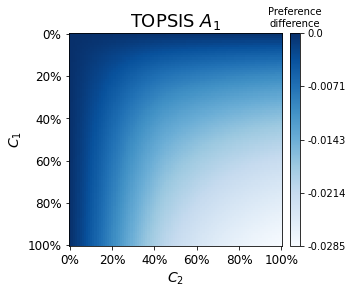

Min: -0.0011887990026158146	Max: 0.0


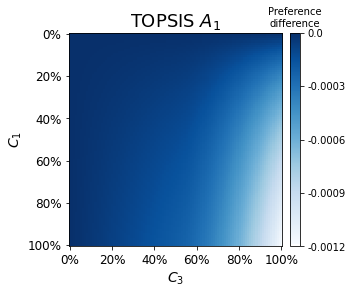

Min: 0.0	Max: 0.1104126030619359


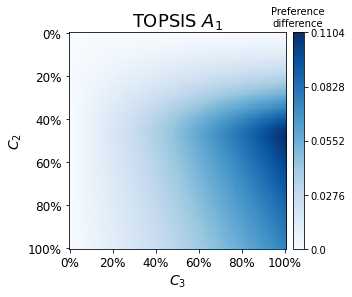

Min: 0.0	Max: 0.07617523356593803


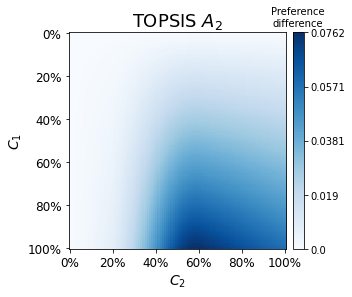

Min: 0.0	Max: 0.0028247992333299554


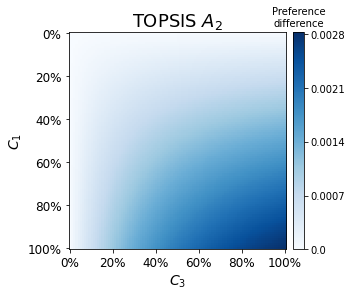

Min: -0.05226692891908591	Max: 0.00304356449760268


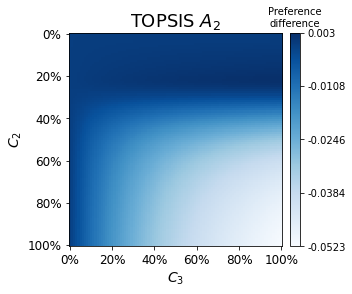

Min: -0.027517207880163874	Max: 0.0


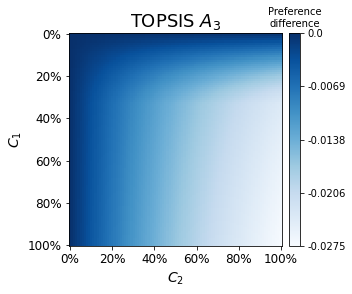

Min: 0.0	Max: 0.10374310022021604


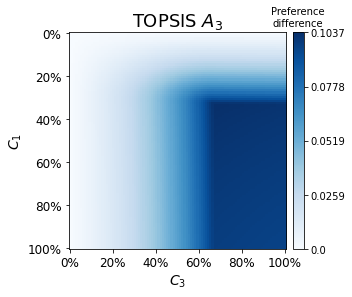

Min: -0.022049284017840565	Max: 0.0


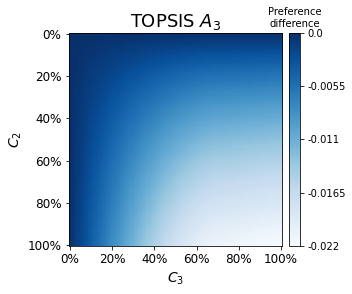

Min: 0.0	Max: 0.0


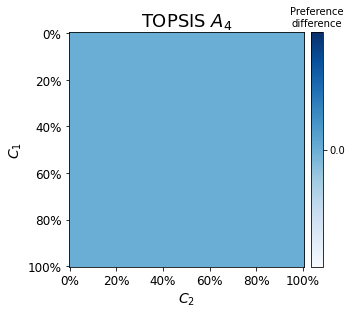

Min: 0.0	Max: 0.0


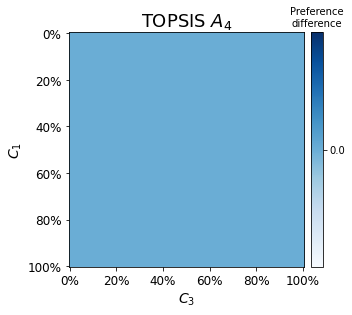

Min: 0.0	Max: 0.0


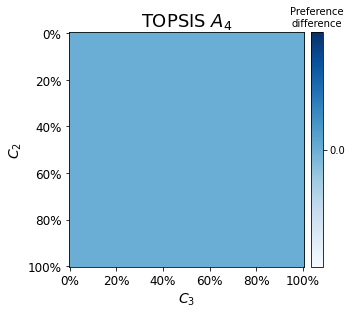

Min: 0.0	Max: 0.0


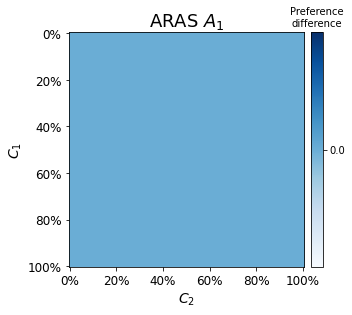

Min: 0.0	Max: 0.0


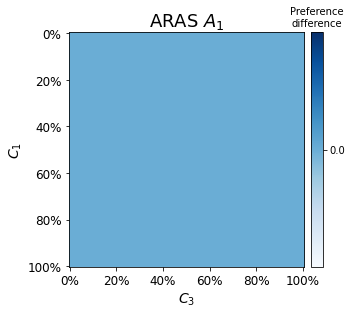

Min: -0.02000000000000013	Max: 2.220446049250313e-16


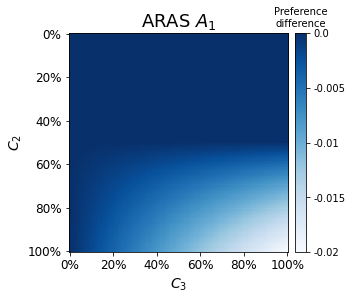

Min: -0.018749999999999822	Max: 0.006250000000000144


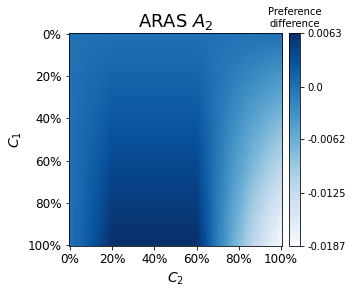

Min: 0.0	Max: 0.0


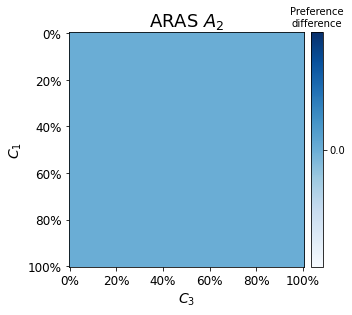

Min: 0.0	Max: 0.0


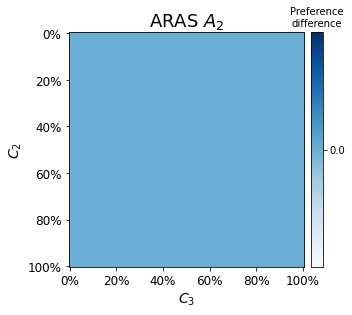

Min: -0.018750000000000044	Max: 0.0


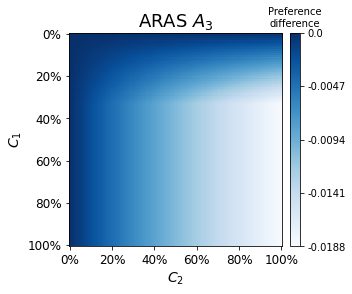

Min: -2.220446049250313e-16	Max: 1.1102230246251565e-16


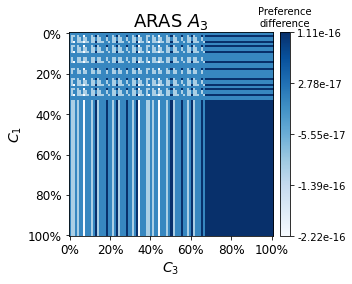

Min: -0.019999999999999907	Max: 0.0


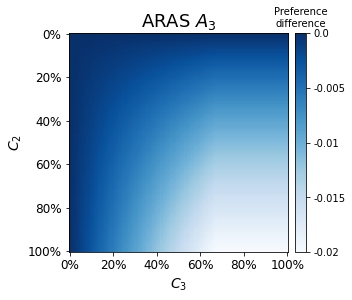

Min: 0.0	Max: 0.0


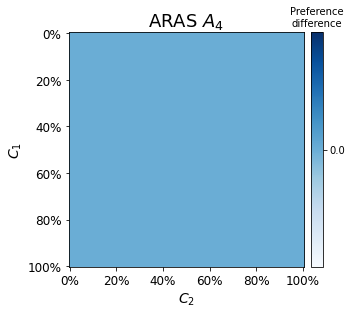

Min: 0.0	Max: 0.0


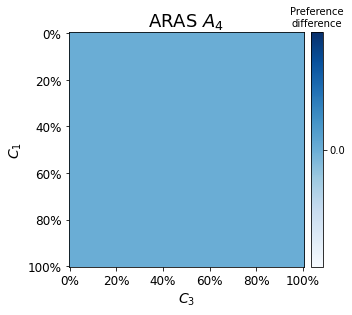

Min: 0.0	Max: 0.0


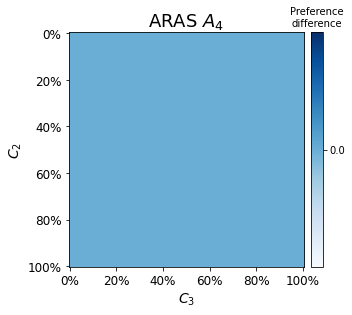

Min: -2.275530893214306e-05	Max: 0.0030063189421231096


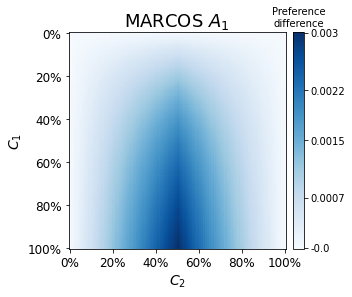

Min: 0.0	Max: 0.0027415334517216783


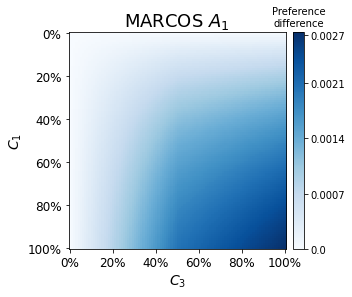

Min: -0.018051529398082744	Max: 0.0


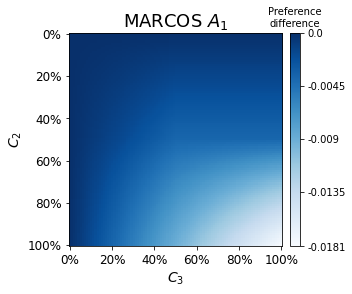

Min: -0.022094743525414573	Max: 0.0033651725187356374


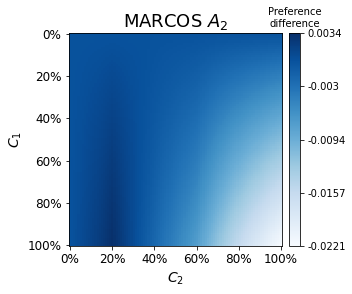

Min: 0.0	Max: 0.0029405967384314446


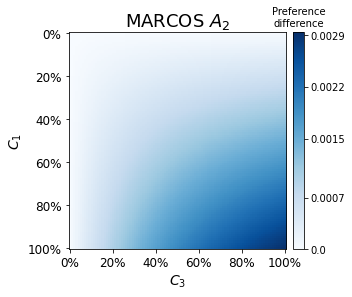

Min: 0.0	Max: 0.0055656474764078645


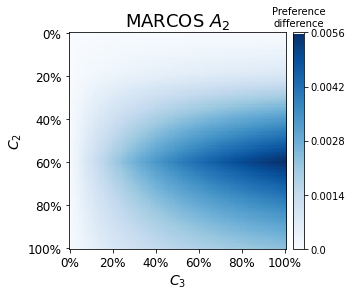

Min: -0.01967912388114912	Max: 0.0


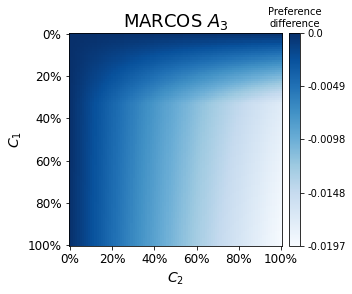

Min: -4.440892098500626e-16	Max: 0.0008266117062762923


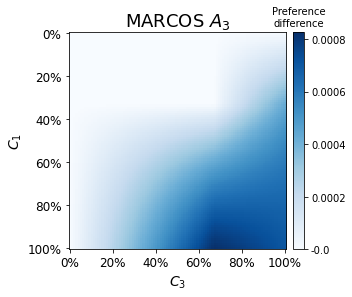

Min: -0.019825033648015356	Max: 0.0


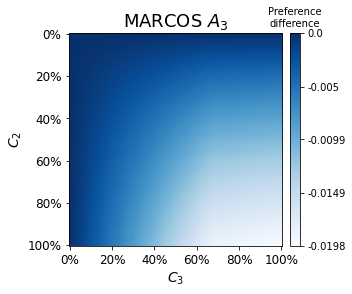

Min: -0.0038520824137614484	Max: 0.0


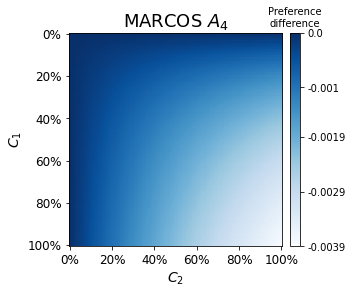

Min: -0.002762286609111597	Max: 0.0


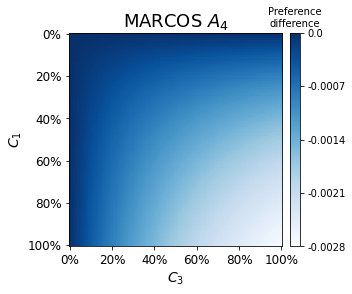

Min: -0.004086239407506187	Max: 0.0


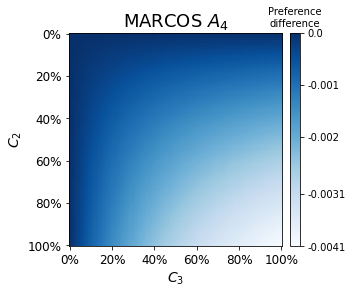

Min: -0.1263833992094862	Max: 0.1324110671936758


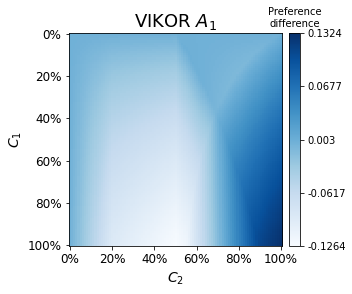

Min: -0.01704545454545464	Max: 0.0


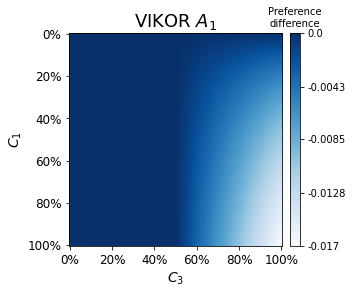

Min: -0.13260091743119273	Max: 0.0625


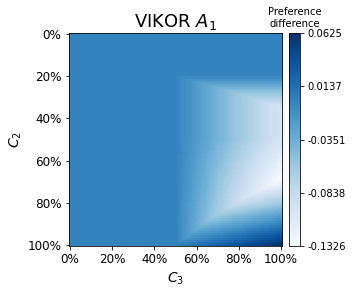

Min: 0.0	Max: 0.0


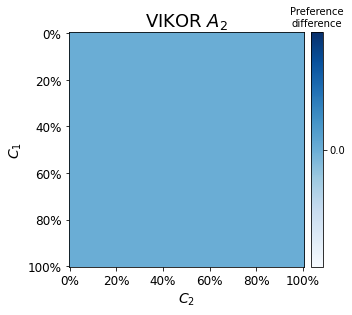

Min: 0.0	Max: 0.0


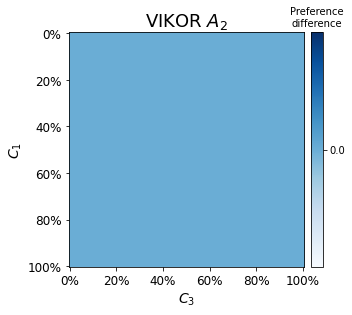

Min: -0.12877846790890268	Max: 0.0


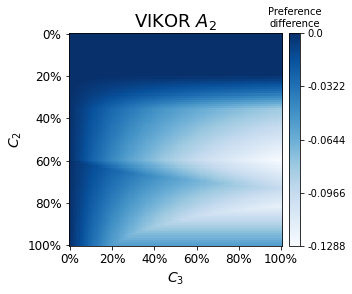

Min: -0.012465659340659296	Max: 0.2240411076711385


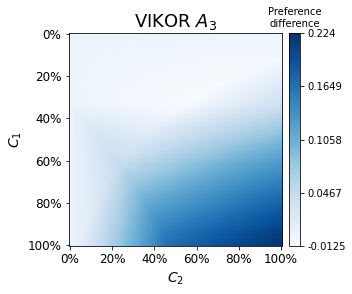

Min: -0.09913173652694615	Max: 0.16501332989336082


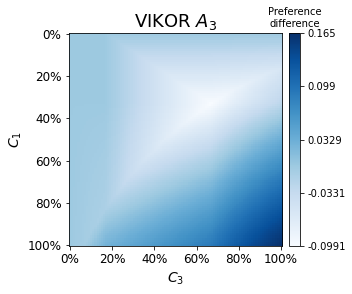

Min: -0.01986409865242822	Max: 0.1645833333333333


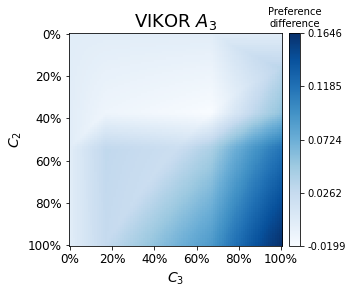

Min: 0.0	Max: 0.0


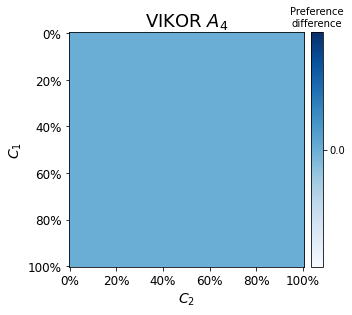

Min: 0.0	Max: 0.0


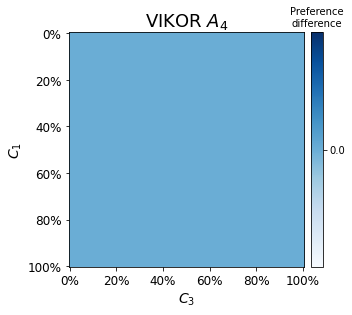

Min: 0.0	Max: 0.0


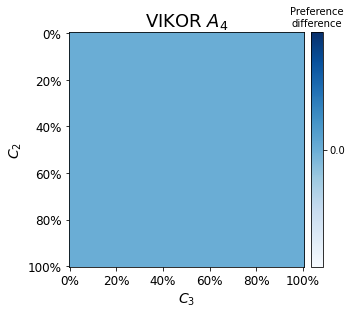

Min: 0.0	Max: 0.0


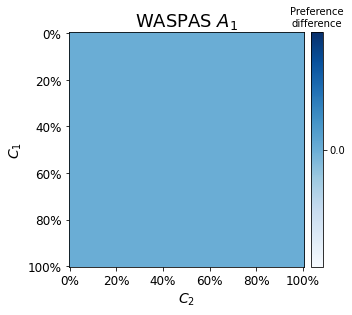

Min: 0.0	Max: 0.0


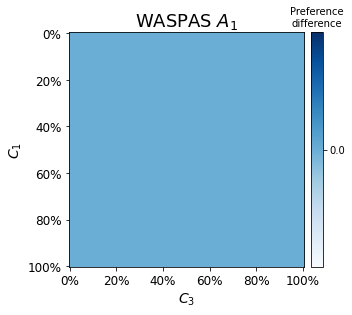

Min: 0.0	Max: 0.03421728285945125


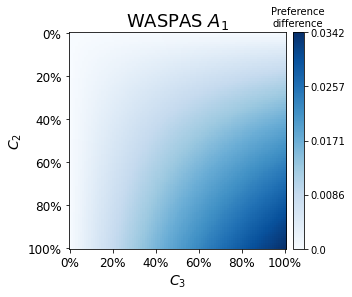

Min: 0.0	Max: 0.07624922048489424


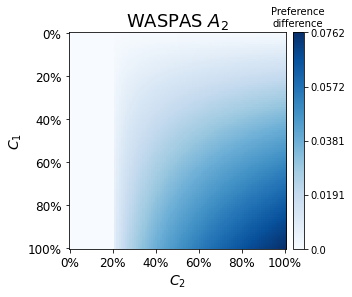

Min: 0.0	Max: 0.0


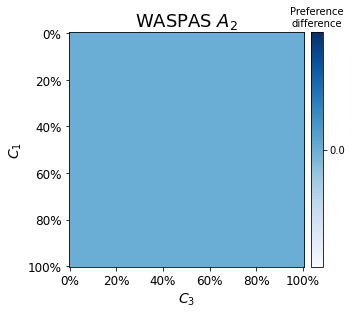

Min: 0.0	Max: 0.0


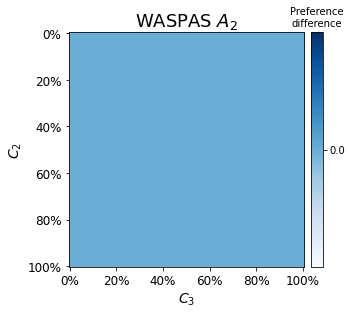

Min: 0.0	Max: 0.008413730618396786


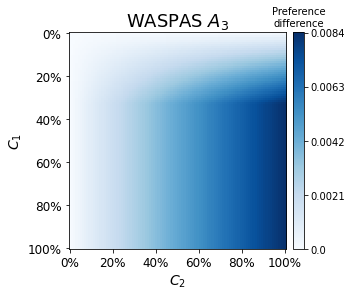

Min: 0.0	Max: 0.003110142614846989


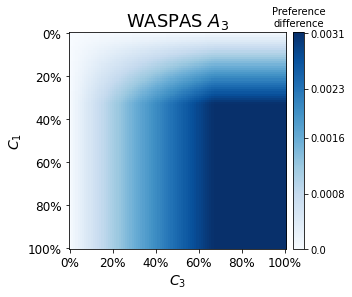

Min: 0.0	Max: 0.010040500627058968


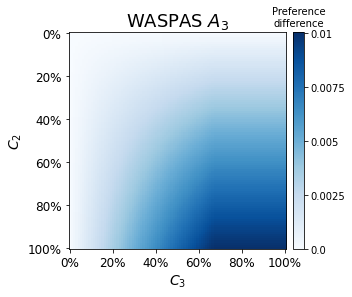

Min: 0.0	Max: 0.0


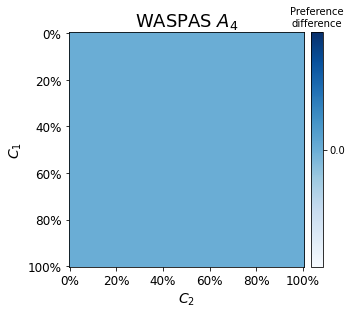

Min: 0.0	Max: 0.0


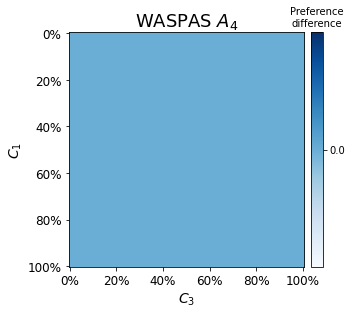

Min: 0.0	Max: 0.0


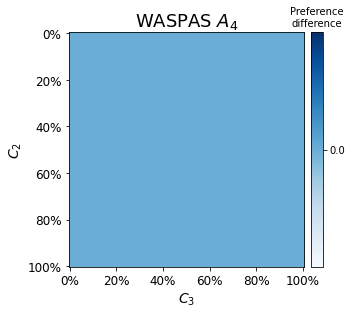

Min: -5.551115123125783e-17	Max: 1.1102230246251565e-16


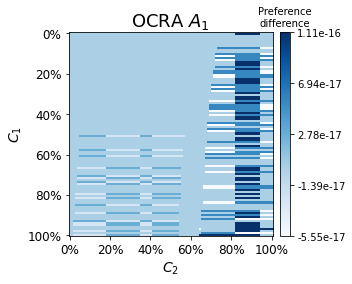

Min: -2.7755575615628914e-17	Max: 2.7755575615628914e-17


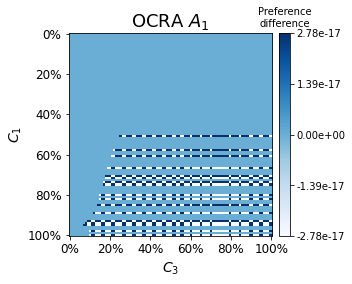

Min: -5.551115123125783e-17	Max: 1.1102230246251565e-16


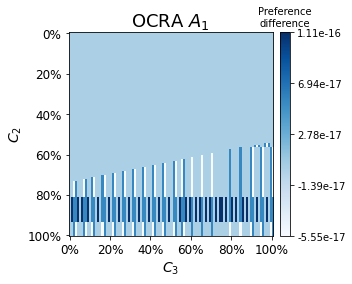

Min: 0.0	Max: 0.07499999999999996


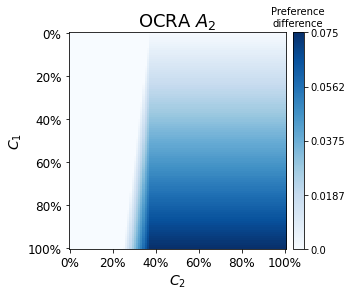

Min: 0.0	Max: 0.0


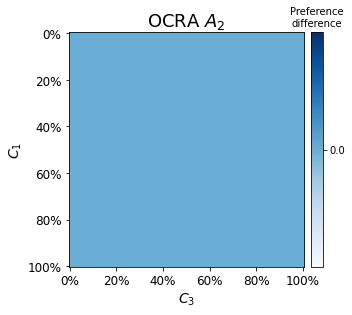

Min: 0.0	Max: 0.040000000000000036


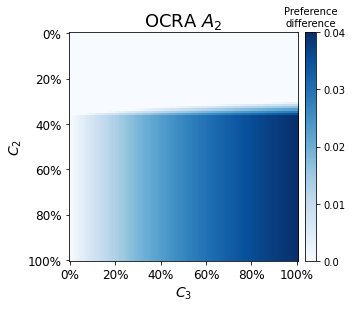

Min: -1.1102230246251565e-16	Max: 5.551115123125783e-17


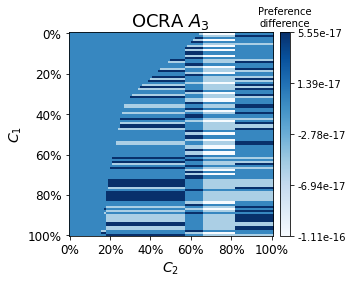

Min: -1.1102230246251565e-16	Max: 1.1102230246251565e-16


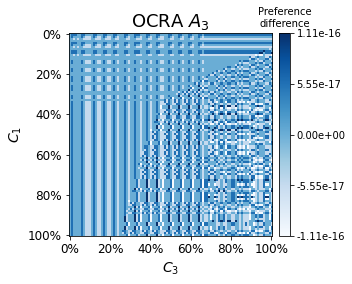

Min: -1.1102230246251565e-16	Max: 5.551115123125783e-17


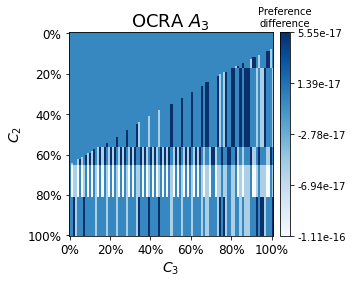

Min: -2.220446049250313e-16	Max: 1.1102230246251565e-16


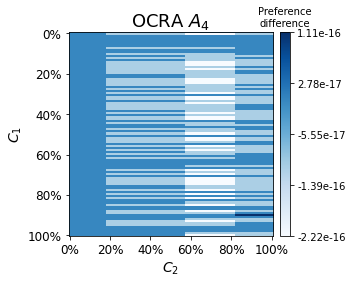

Min: -2.220446049250313e-16	Max: 1.1102230246251565e-16


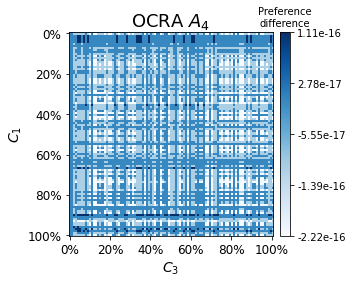

Min: -2.220446049250313e-16	Max: 0.0


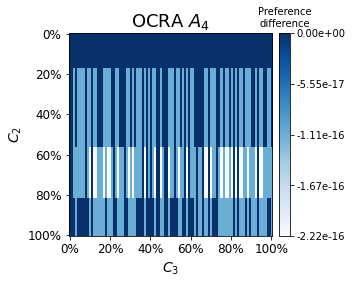

Min: -0.15315195046680263	Max: 0.11675926647116386


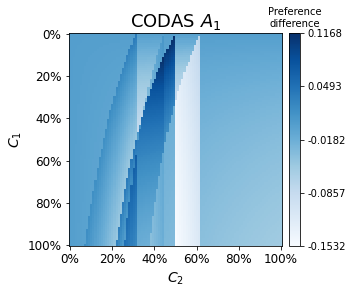

Min: 0.0	Max: 0.0018040293977485966


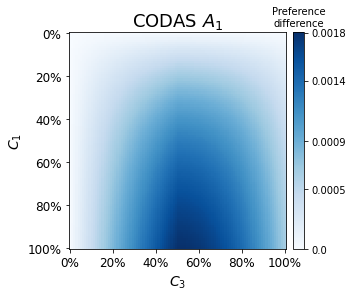

Min: -0.0877632421393153	Max: 0.11680000000000001


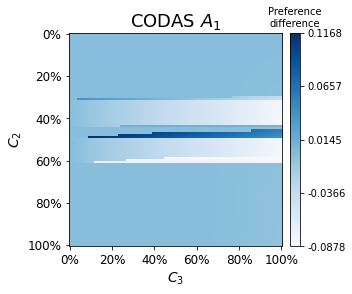

Min: -0.1413575491752841	Max: 0.15895266994729407


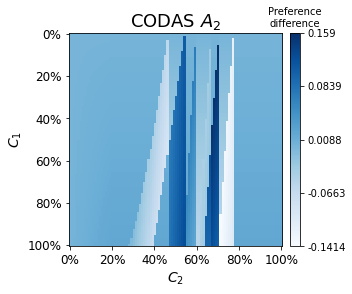

Min: 0.0	Max: 0.001682551599677229


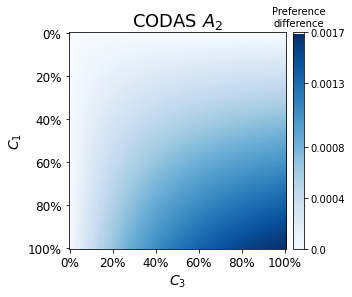

Min: -0.22083041298485506	Max: 0.1490915706553897


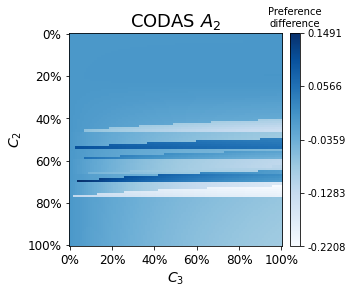

Min: -0.20200056832054836	Max: 0.11194571680732013


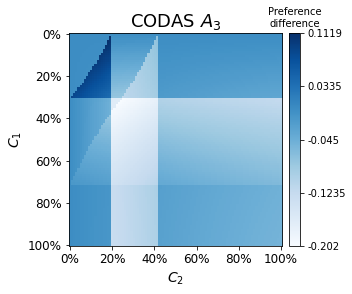

Min: -0.12046088348313333	Max: 0.07754400376445136


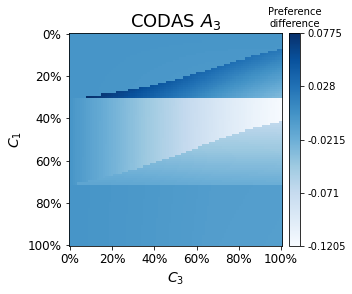

Min: -0.12162749392871652	Max: 0.1020500864461571


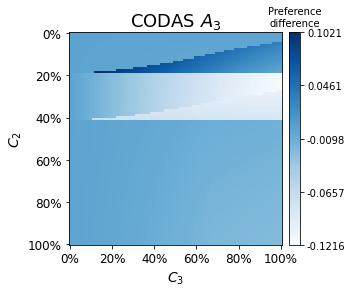

Min: -0.019537786875033936	Max: 0.0


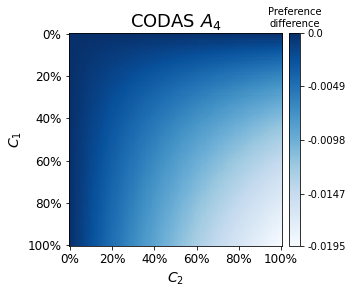

Min: -0.002051611720812696	Max: 0.0


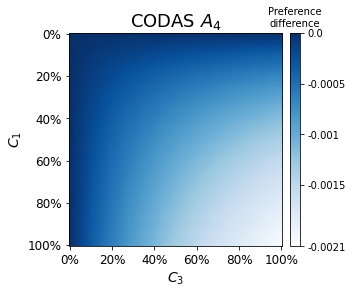

Min: -0.01225392424509697	Max: 0.0


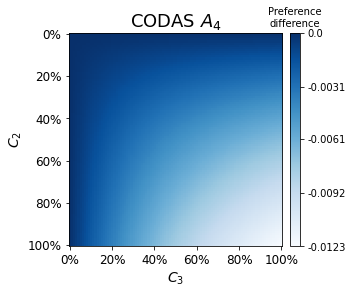

Min: 0.0	Max: 0.0


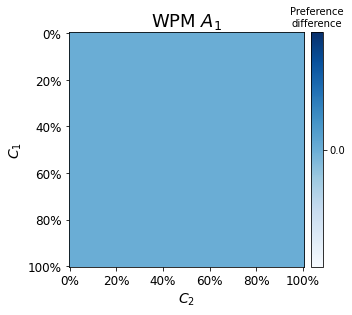

Min: 0.0	Max: 0.0


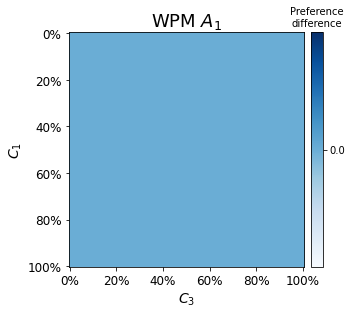

Min: 0.0	Max: 0.0684345657189026


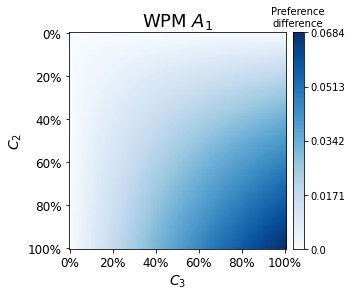

Min: 0.0	Max: 0.15249844096978848


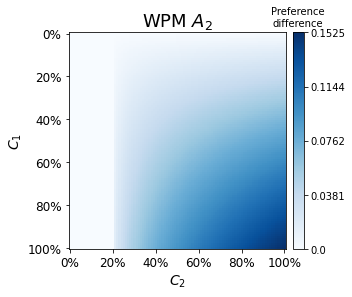

Min: 0.0	Max: 0.0


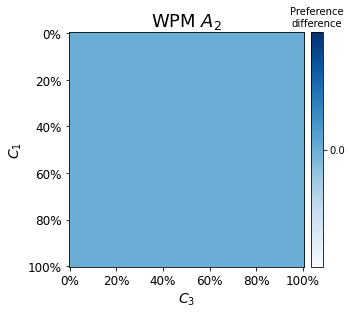

Min: 0.0	Max: 0.0


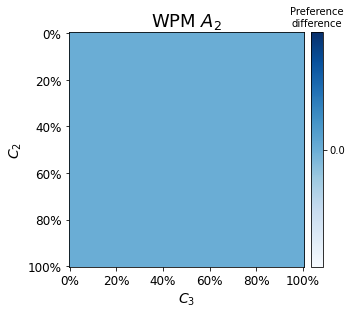

Min: 0.0	Max: 0.016827461236793684


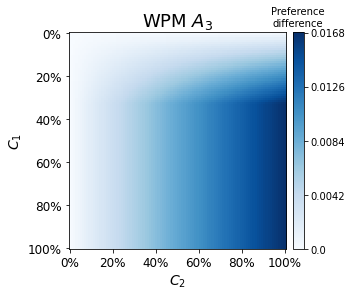

Min: 0.0	Max: 0.006220285229693867


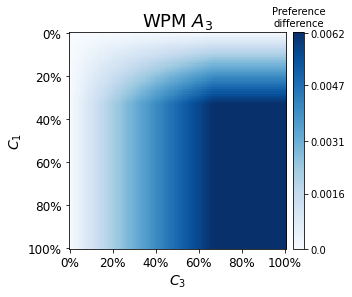

Min: 0.0	Max: 0.020081001254117603


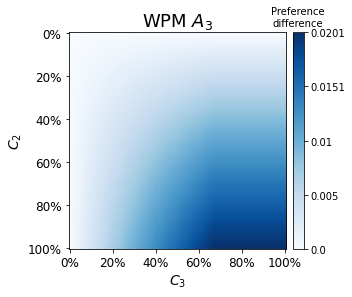

Min: 0.0	Max: 0.0


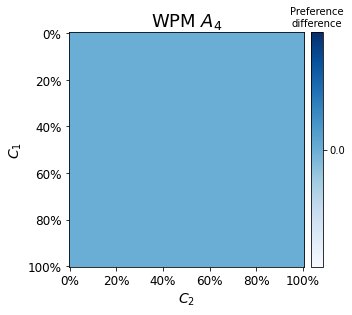

Min: 0.0	Max: 0.0


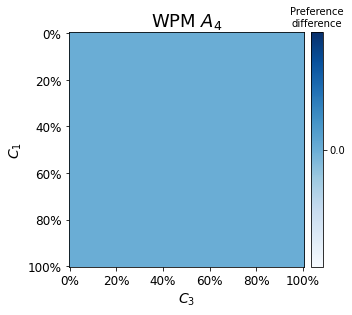

Min: 0.0	Max: 0.0


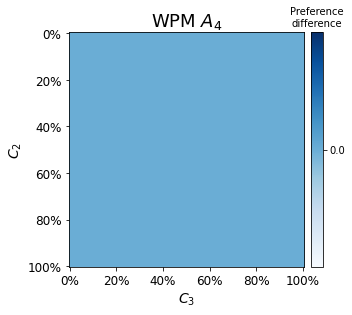

Min: 0.0	Max: 0.0


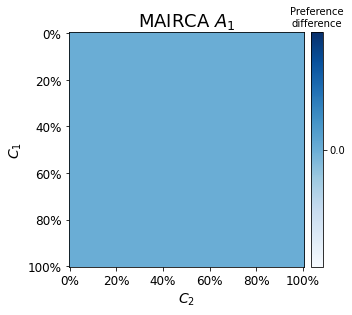

Min: 0.0	Max: 0.0


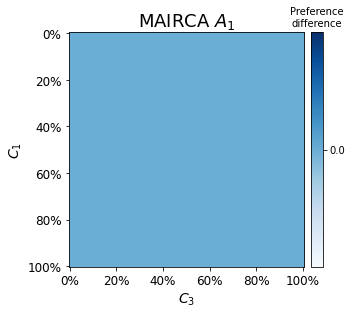

Min: -1.3877787807814457e-17	Max: 1.3877787807814457e-17


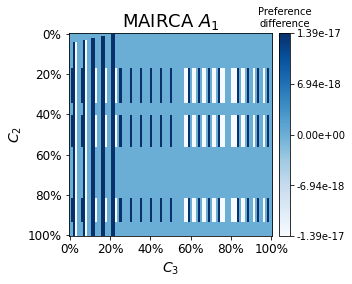

Min: -2.7755575615628914e-17	Max: 2.7755575615628914e-17


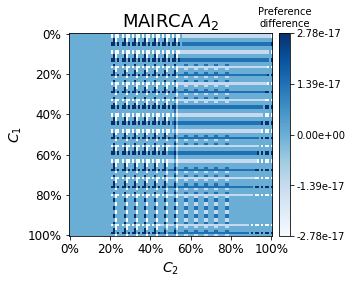

Min: 0.0	Max: 0.0


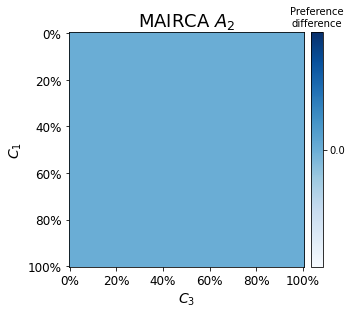

Min: 0.0	Max: 0.0


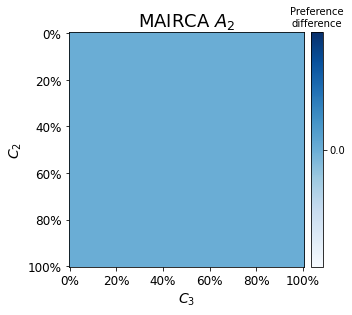

Min: -1.3877787807814457e-17	Max: 1.3877787807814457e-17


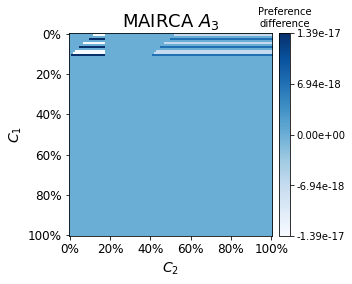

Min: -1.3877787807814457e-17	Max: 1.3877787807814457e-17


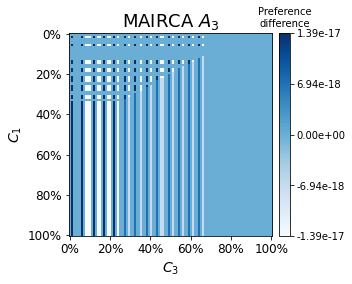

Min: -1.3877787807814457e-17	Max: 1.3877787807814457e-17


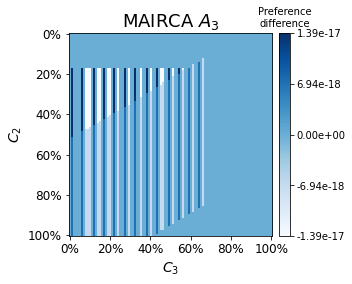

Min: 0.0	Max: 0.0


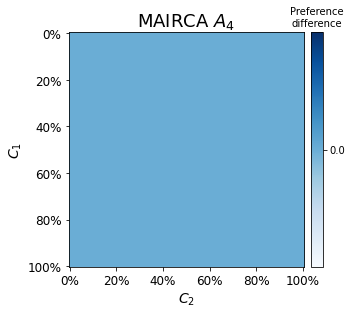

Min: 0.0	Max: 0.0


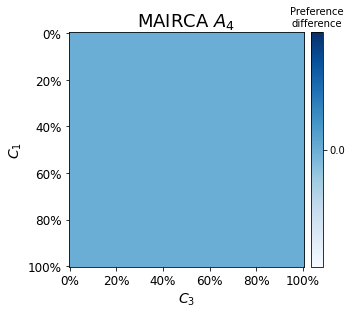

Min: 0.0	Max: 0.0


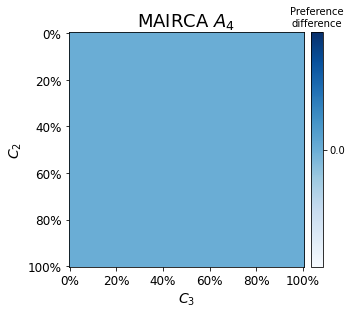

Min: 0.0	Max: 0.0


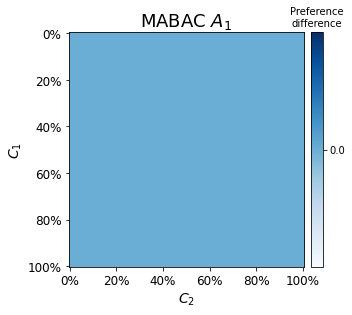

Min: 0.0	Max: 0.0


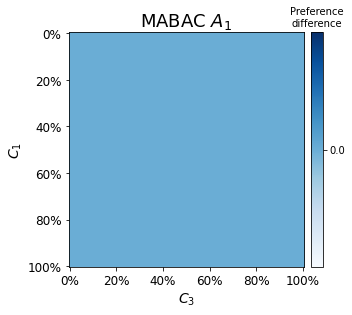

Min: 0.0	Max: 0.0


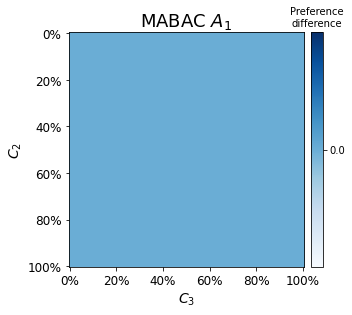

Min: 0.0	Max: 0.0


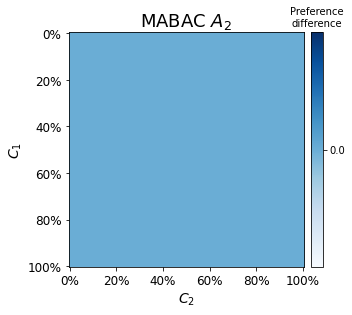

Min: 0.0	Max: 0.0


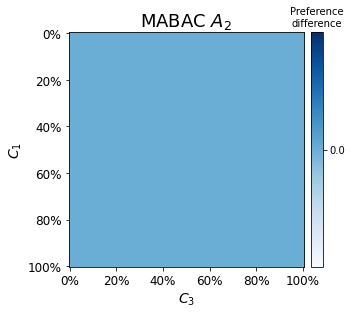

Min: 0.0	Max: 0.0


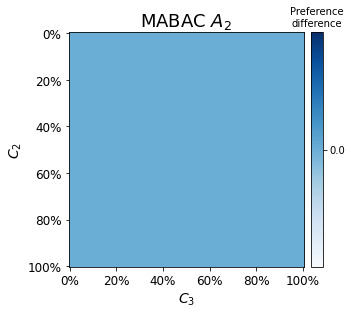

Min: 0.0	Max: 0.0


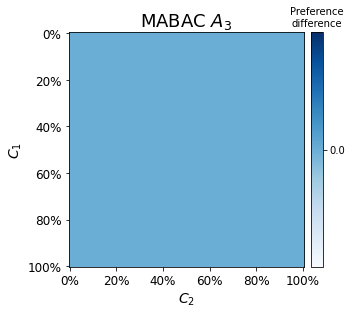

Min: 0.0	Max: 0.0


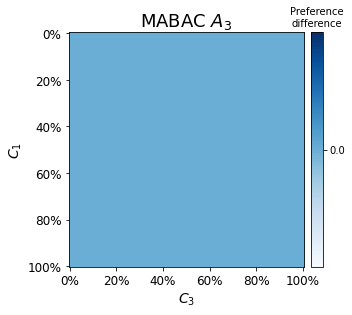

Min: 0.0	Max: 0.0


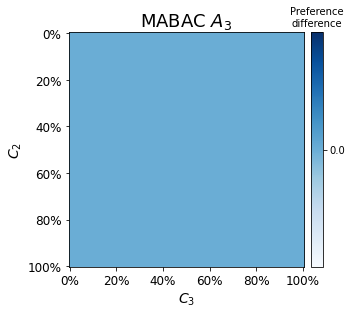

Min: -5.551115123125783e-17	Max: 5.551115123125783e-17


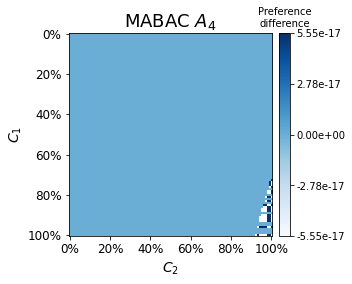

Min: 0.0	Max: 0.0


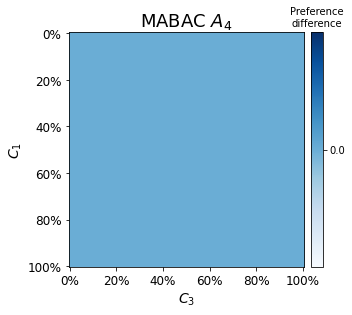

Min: 0.0	Max: 0.0


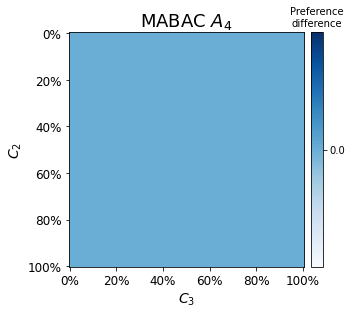

In [32]:
changes_methods = []

for name, method in methods_dict.items():
    data, error = examine_error(matrix, weights, types, method, 100)
    combs = generate_combinations(matrix)

    changes_counter = 0

    for alt in range(len(error)):
        
        for comb in range(len(error[alt])):
            error_matrix = np.array(error[alt][comb]).reshape(101, 101)

            fig, ax = plt.subplots(figsize=(5, 5))
            plt.title(f'{name} $A_{{{alt+1}}}$', fontsize=18)
            ticks = np.arange(0, 101, 20)
            ticks_labels = [f'{x}%' for x in ticks]
            plt.xticks(ticks, ticks_labels, fontsize=12)
            plt.yticks(ticks, ticks_labels, fontsize=12)
            plt.ylabel(f'$C_{{{combs[comb][0]+1}}}$', fontsize=14)
            plt.xlabel(f'$C_{{{combs[comb][1]+1}}}$', fontsize=14)
            plt.imshow(error_matrix, cmap='Blues', interpolation='None')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = plt.colorbar(cax=cax)

            plt.title('Preference\ndifference', fontsize=10)
            print(f'Min: {np.min(error_matrix)}\tMax: {np.max(error_matrix)}')
            cbar_labels = None
            if np.max(error_matrix) != np.min(error_matrix): 
                changes_counter += 1
                step = (np.max(error_matrix) - np.min(error_matrix)) / 5

                if abs(np.min(error_matrix) - np.max(error_matrix)) < 0.00001:  
                    cbar_ticks = np.linspace(np.min(error_matrix), np.max(error_matrix), 5, endpoint=True)
                    cbar_labels = [f'{x:.2e}' for x in np.linspace(np.min(error_matrix), np.max(error_matrix), 5, endpoint=True)]
                else:
                    cbar_ticks = np.round(np.linspace(np.min(error_matrix), np.max(error_matrix), 5, endpoint=True), 4)
            else:
                cbar_ticks = [np.round(np.min(error_matrix), 3)]

            cbar.ax.set_yticks(cbar_ticks)
            if cbar_labels is None:
                cbar.ax.set_yticklabels(cbar_ticks)
            else:
                cbar.ax.set_yticklabels(cbar_labels)

            plt.tight_layout()
            plt.show()
    
    changes_methods.append([changes_counter, round(changes_counter/(len(error)*len(combs))*100)])

### Percent of changes in preferences for methods

In [34]:
for idx, name in enumerate(list(methods_dict.keys())):
    print(f'{name}: Changes {changes_methods[idx][0]} ({changes_methods[idx][1]}%)')

TOPSIS: Changes 9 (75%)
ARAS: Changes 5 (42%)
MARCOS: Changes 12 (100%)
VIKOR: Changes 7 (58%)
WASPAS: Changes 5 (42%)
OCRA: Changes 11 (92%)
CODAS: Changes 12 (100%)
WPM: Changes 5 (42%)
MAIRCA: Changes 5 (42%)
MABAC: Changes 1 (8%)
